In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [2]:
data = pd.read_csv("C:\\Users\\kiran\\Downloads\\Bank1_Full (1).csv")
data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
data1 = data.drop(["contact" , "poutcome"], axis=1)
data1.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,no,2143,yes,no,5,may,261,1,-1,0,no
1,44,technician,single,secondary,no,29,yes,no,5,may,151,1,-1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,76,1,-1,0,no
3,47,blue-collar,married,unknown,no,1506,yes,no,5,may,92,1,-1,0,no
4,33,unknown,single,unknown,no,1,no,no,5,may,198,1,-1,0,no


In [5]:
data1['default']= data1['default'].replace(['yes', 'no'],['1','0'])
data1['loan']= data1['loan'].replace(['yes', 'no'],['1','0'])
data1['y']= data1['y'].replace(['yes', 'no'],['1','0'])
data1['housing']= data1['housing'].replace(['yes', 'no'],['1','0'])
data1.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,0,2143,1,0,5,may,261,1,-1,0,0
1,44,technician,single,secondary,0,29,1,0,5,may,151,1,-1,0,0
2,33,entrepreneur,married,secondary,0,2,1,1,5,may,76,1,-1,0,0
3,47,blue-collar,married,unknown,0,1506,1,0,5,may,92,1,-1,0,0
4,33,unknown,single,unknown,0,1,0,0,5,may,198,1,-1,0,0


In [6]:
data1.job.value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [7]:
data1['job']=data1['job'].replace(['blue-collar', 'management', 'technician', 'admin.', 'services', 'retired' , 'self-employed',
                                  'entrepreneur' , 'unemployed' , 'housemaid' , 'student', 'unknown'],['1', '2','3','4','5',
                                                                                                       '6','7','8','9','10',
                                                                                                       '11','0' ])
data1['job']=pd.to_numeric(data1['job'],errors='coerce')

In [8]:
data1['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [9]:
data1['marital']=data1['marital'].replace(['single', 'married','divorced'],['1','2','3'])
data1['marital']=pd.to_numeric(data1['marital'],errors='coerce')

In [10]:
data1['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [11]:
data1['education']=data1['education'].replace(['primary' , 'secondary', 'tertiary', 'unknown'],['1','2','3','0'])
data1['education']=pd.to_numeric(data1['education'],errors='coerce')

In [12]:
data1['month'].value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

In [13]:
data1['month']=data1['month'].replace(['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'],
                                     ['1','2','3','4','5','6','7','8','9','10','11','12'])
data1['month']=pd.to_numeric(data1['month'],errors='coerce')

In [14]:
data1

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y
0,58,2,2,3,0,2143,1,0,5,5,261,1,-1,0,0
1,44,3,1,2,0,29,1,0,5,5,151,1,-1,0,0
2,33,8,2,2,0,2,1,1,5,5,76,1,-1,0,0
3,47,1,2,0,0,1506,1,0,5,5,92,1,-1,0,0
4,33,0,1,0,0,1,0,0,5,5,198,1,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,3,2,3,0,825,0,0,17,11,977,3,-1,0,1
45207,71,6,3,1,0,1729,0,0,17,11,456,2,-1,0,1
45208,72,6,2,2,0,5715,0,0,17,11,1127,5,184,3,1
45209,57,1,2,2,0,668,0,0,17,11,508,4,-1,0,0


In [15]:
data1['loan']=pd.to_numeric(data1['loan'],errors='coerce')
data1['housing']=pd.to_numeric(data1['housing'],errors='coerce')
data1['default']=pd.to_numeric(data1['default'],errors='coerce')
data1['y']=pd.to_numeric(data1['y'],errors='coerce')

In [16]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        45211 non-null  int64
 1   job        45211 non-null  int64
 2   marital    45211 non-null  int64
 3   education  45211 non-null  int64
 4   default    45211 non-null  int64
 5   balance    45211 non-null  int64
 6   housing    45211 non-null  int64
 7   loan       45211 non-null  int64
 8   day        45211 non-null  int64
 9   month      45211 non-null  int64
 10  duration   45211 non-null  int64
 11  campaign   45211 non-null  int64
 12  pdays      45211 non-null  int64
 13  previous   45211 non-null  int64
 14  y          45211 non-null  int64
dtypes: int64(15)
memory usage: 5.2 MB


In [17]:
# now all the inputs are in int form and our output 'y' is in categorical which is binary 

In [18]:
# dividing our data in inputs(X) and outputs(Y)

X = data1.iloc[:,0:14]
Y = data1.iloc[:,-1]
Y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64

In [19]:
# create a logistic model :-

model = LogisticRegression()
model.fit(X,Y)

C:\Users\kiran\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
y_prob = model.predict_proba(X)
y_pred = model.predict(X)

In [21]:
pd.DataFrame(y_prob)

,0,1
0,0.933473,0.066527
1,0.904494,0.095506
2,0.894374,0.105626
3,0.921997,0.078003
4,0.777728,0.222272
...,...,...
45206,0.671564,0.328436
45207,0.922600,0.077400
45208,0.612819,0.387181
45209,0.943470,0.056530


In [22]:
# now we will compare the actual data with the predicted data

df = pd.DataFrame ({ 'actual' : Y,
                   'predict': y_pred })

In [23]:
df

,actual,predict
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,0
45207,1,0
45208,1,0
45209,0,0


In [24]:
pd.crosstab(df.actual , df.predict)

predict,0,1
actual,,
0,39162,760
1,4353,936


In [25]:
# so the correct classification is 39191+833 = 40024
# incorrect classification is 4390+731 = 5121

In [26]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [27]:
cm = confusion_matrix(Y,y_pred)
cm

array([[39162,   760],
       [ 4353,   936]], dtype=int64)

In [28]:
accuracy = accuracy_score (Y, y_pred)
accuracy

0.8869080533498485

In [29]:
TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]

sensitivity = TP/(TP+FN)
spe = TN/(TN+FP)
precision = TP/(TP+FP)
print("Sensitivity:-",sensitivity , "SPECIFICITY:-", spe , "PRECISION:- ",precision)

Sensitivity:- 0.17697107203630175 SPECIFICITY:- 0.9809628776113422 PRECISION:-  0.5518867924528302


In [30]:
# the accuracy for this model is 88.6% which is good.

In [31]:
from sklearn.metrics import classification_report

In [32]:
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.55      0.18      0.27      5289

    accuracy                           0.89     45211
   macro avg       0.73      0.58      0.60     45211
weighted avg       0.86      0.89      0.86     45211



In [33]:
# ROC curve :-============

In [34]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [35]:
fpr , tpr, thresholds = roc_curve(Y, y_prob[:,1])

In [36]:
df_new = pd.DataFrame({"fpr":fpr, "tpr":tpr, "cutoff":thresholds})

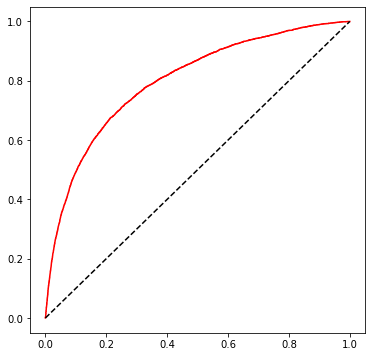

In [37]:
f=plt.figure()
f.set_figwidth(6)
f.set_figheight(6)

plt.plot(fpr, tpr , color='red')
plt.plot([0,1],[0,1],'k--')

In [38]:
df_new[(df_new.fpr<=0.34) & (df_new.tpr>=0.78)]

,fpr,tpr,cutoff
5553,0.332724,0.780110,0.101735
5554,0.332899,0.780110,0.101667
5555,0.332899,0.780299,0.101662
5556,0.332974,0.780299,0.101656
5557,0.332974,0.780488,0.101655
5558,0.332999,0.780488,0.101645
5559,0.332999,0.780677,0.101643
5560,0.333375,0.780677,0.101570
5561,0.333375,0.780866,0.101567
5562,0.333651,0.780866,0.101505


In [39]:
prob=model.predict_proba(X)
prob=prob[:,1]

new_pred=pd.DataFrame({'actual':Y,'pred':0})
new_pred.loc[prob>0.099,"pred"]=1
new_pred

,actual,pred
0,0,0
1,0,0
2,0,1
3,0,0
4,0,1
...,...,...
45206,1,1
45207,1,0
45208,1,1
45209,0,0


In [40]:
cm_new=confusion_matrix(new_pred.actual,new_pred.pred)
cm_new
print(classification_report(new_pred.actual,new_pred.pred))

              precision    recall  f1-score   support

           0       0.96      0.66      0.78     39922
           1       0.23      0.79      0.36      5289

    accuracy                           0.67     45211
   macro avg       0.60      0.72      0.57     45211
weighted avg       0.87      0.67      0.73     45211

